In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Configuration graphique
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
print("Bibliothèques importées avec succès")

Bibliothèques importées avec succès


In [13]:
# Charger le jeu de données California Housing
housing = fetch_california_housing(as_frame=True)
df = housing.frame
print(f"Dimensions du dataset : {df.shape[0]} lignes × {df.shape[1]} colonnes")
print(f"\nVariable cible : MedHouseVal (valeur médiane du logement en centaines de milliers de $)")
print(f"\nDescription des variables :")
print("-" * 60)
descriptions = {
'MedInc': 'Revenu médian du quartier',
'HouseAge': 'Âge médian des logements',
'AveRooms': 'Nombre moyen de pièces par logement',
'AveBedrms': 'Nombre moyen de chambres par logement',
'Population': 'Population du quartier',
'AveOccup': 'Nombre moyen d\'occupants par logement',
'Latitude': 'Latitude géographique',
'Longitude': 'Longitude géographique',
'MedHouseVal': 'Prix médian du logement (cible)'
}
for col, desc in descriptions.items():
    print(f"  {col:15s} → {desc}")

Dimensions du dataset : 20640 lignes × 9 colonnes

Variable cible : MedHouseVal (valeur médiane du logement en centaines de milliers de $)

Description des variables :
------------------------------------------------------------
  MedInc          → Revenu médian du quartier
  HouseAge        → Âge médian des logements
  AveRooms        → Nombre moyen de pièces par logement
  AveBedrms       → Nombre moyen de chambres par logement
  Population      → Population du quartier
  AveOccup        → Nombre moyen d'occupants par logement
  Latitude        → Latitude géographique
  Longitude       → Longitude géographique
  MedHouseVal     → Prix médian du logement (cible)


In [15]:
# Afficher les premières lignes avec .head()
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [16]:
# Utiliser .info() pour vérifier les types de colonnes
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [17]:
# Utiliser .describe() pour obtenir les statistiques descriptives :
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [19]:
# 2.Nettoyage
# Vérifier les valeurs manquantes avec .isnull().sum()
df.isnull().sum()
# Si présentes : soit les supprimer (.dropna), soit les imputer (.fillna)
df.dropna()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [21]:
# Vérifier et supprimer les doublons avec .duplicated() et .drop_duplicates()
df.duplicated()
df.drop_duplicates()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


<Axes: >

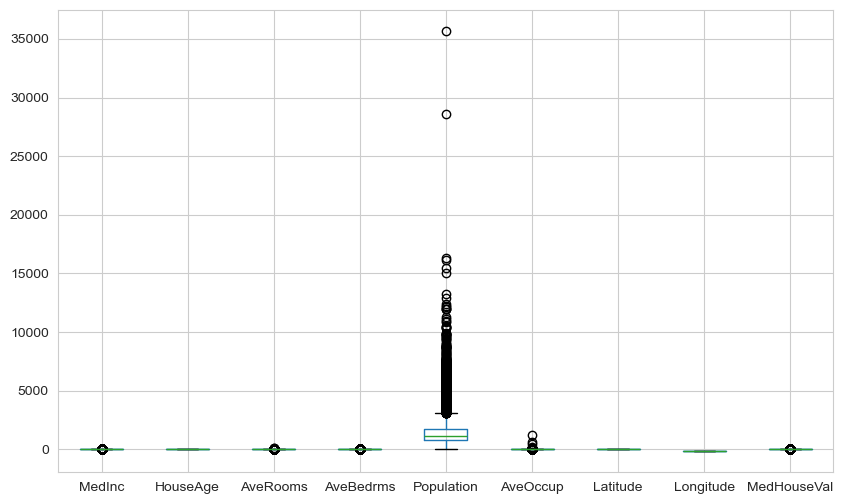

In [22]:
# Détecter les valeurs aberrantes (outliers) à l'aide de boxplots
df.boxplot()

In [ ]:
# Filtrer les outliers extrêmes pour AveRooms, AveBedrms et AveOccup
# On fixe des seuils raisonnables (ex: AveRooms < 50, AveOccup < 20)
# pour éviter que ces valeurs extrêmes faussent le modèle
df = df[(df["AveRooms"] < 50) & (df["AveOccup"] < 20)]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


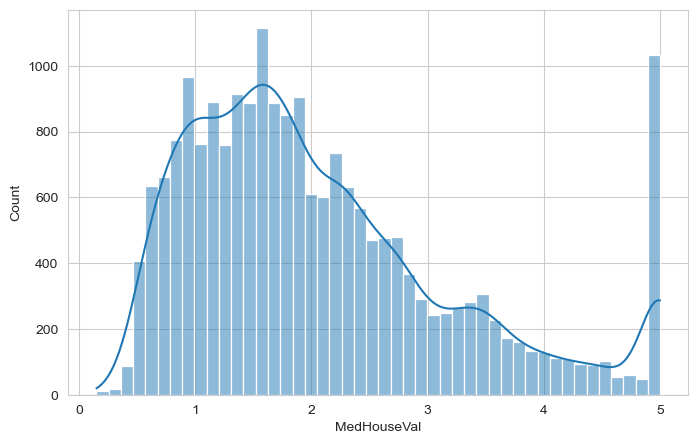

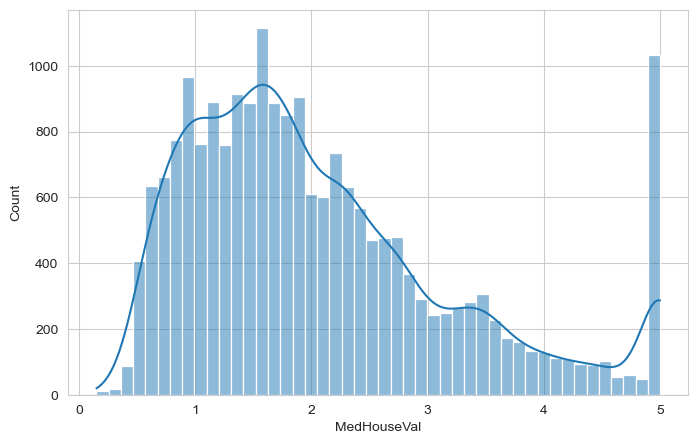

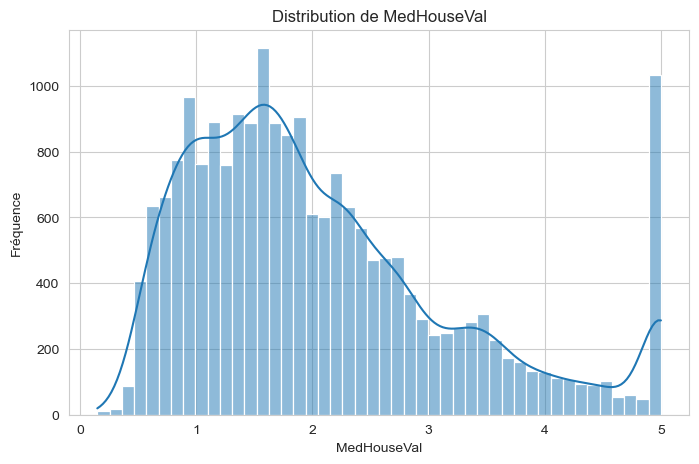

In [27]:
# 3. Analyse exploratoire (EDA)
# Tracer la distribution de la variable cible (MedHouseVal)
# avec un histogramme + courbe de densité (kde)
plt.figure(figsize=(8,5))

sns.histplot(df["MedHouseVal"], kde=True)

plt.title("Distribution de MedHouseVal")
plt.xlabel("MedHouseVal")
plt.ylabel("Fréquence")

plt.show()

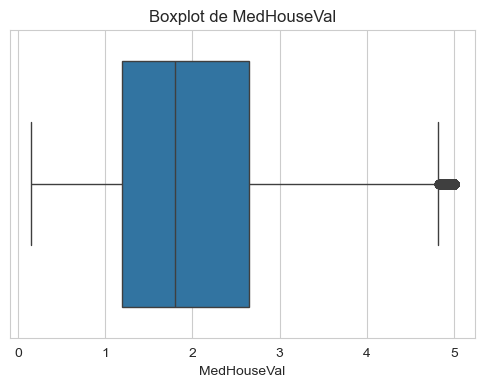

In [ ]:
# Un boxplot pour repérer la médiane et les extrêmes
plt.figure(figsize=(6,4))

sns.boxplot(x=df["MedHouseVal"])
plt.title("Boxplot de MedHouseVal")
plt.show()


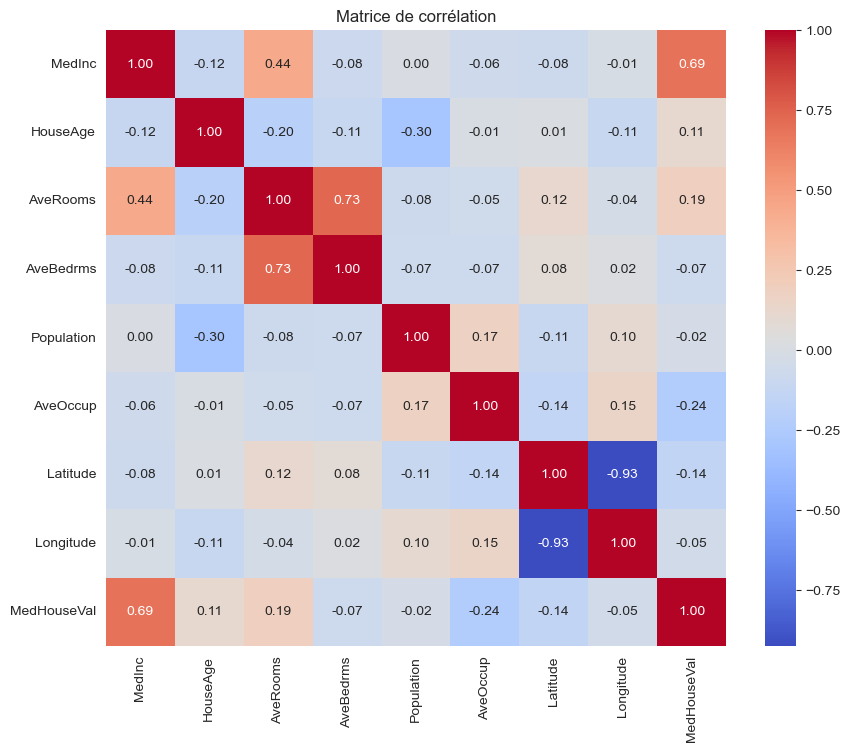

In [30]:
# Calculer et afficher la matrice de corrélation sous forme de heatmap
# Cela permet d'identifier quelles variables sont le plus liées au prix :
#   - corrélation proche de +1 → relation positive forte
#   - corrélation proche de -1 → relation négative forte- corrélation proche de  0 → pas de relation linéaire
corr_matrix = df.corr()
plt.figure(figsize=(10,8))

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Matrice de corrélation")
plt.show()

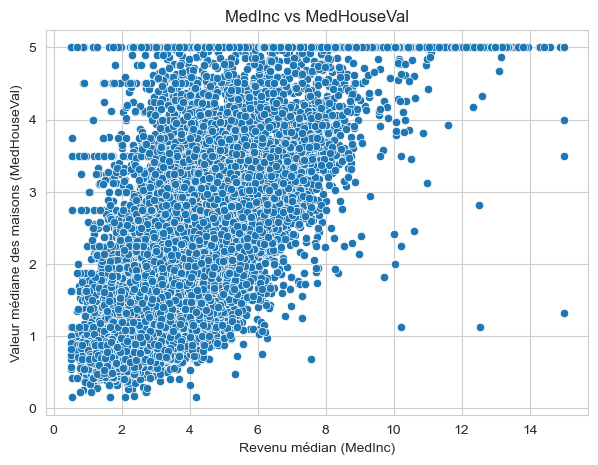

In [31]:
# Scatter plots : croiser les variables les plus corrélées avec la cible
# Ex : MedInc vs MedHouseVal → on s'attend à une relation positive forte
# (plus le revenu est élevé, plus le logement est cher)
plt.figure(figsize=(7,5))

sns.scatterplot(x=df["MedInc"], y=df["MedHouseVal"])

plt.title("MedInc vs MedHouseVal")
plt.xlabel("Revenu médian (MedInc)")
plt.ylabel("Valeur médiane des maisons (MedHouseVal)")

plt.show()

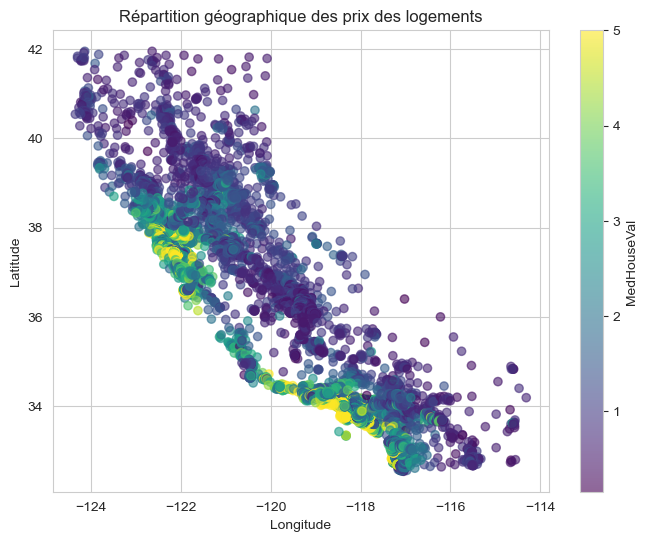

In [33]:
# Carte géographique : afficher chaque quartier (Latitude, Longitude)
# coloré selon le prix médian, pour visualiser la répartition spatiale
# des prix en Californie (zones côtières = plus cher)

plt.figure(figsize=(8,6))

plt.scatter(
    df["Longitude"],
    df["Latitude"],
    c=df["MedHouseVal"],
    cmap="viridis",
    alpha=0.6
)

plt.colorbar(label="MedHouseVal")

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Répartition géographique des prix des logements")

plt.show()

In [47]:
# 4. Ingénierie des variables
# Créer de nouvelles variables dérivées, par exemple :
#   PiecesParChambre = AveRooms / AveBedrms  (ratio pièces/chambres)
#   PopParLogement   = Population / AveOccup  (estimation du nb de logements)
# Ces nouvelles features peuvent capturer des informations supplémentaires
df["PiecesParChambre"] = df["AveRooms"] / df["AveBedrms"].replace(0, 1)
df["PopParLogement"] = df["Population"] / df["AveOccup"].replace(0, 1)

In [36]:
# Séparer les données en :
#   X = variables explicatives (features) → les 10 colonnes d'entrée
#   y = variable cible → MedHouseVal (le prix à prédire)
X = df.drop("MedHouseVal", axis=1)
y = df["MedHouseVal"]

In [37]:
# 5. Séparation entraînement / test
# Diviser X et y en deux sous-ensembles avec train_test_split :
#   - 80% pour l'entraînement (le modèle apprend sur ces données)
#   - 20% pour le test (on évalue la qualité des prédictions)
# Le paramètre random_state=42 garantit la reproductibilité

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

In [39]:
# 6. Construction du modèle de régression linéaire
# Instancier LinearRegression() et entraîner avec .fit(X_train, y_train)
# Le modèle calcule les coefficients β optimaux en minimisant
# la somme des carrés des erreurs (méthode des moindres carrés)

# Afficher :
#   - model.intercept_ → l'ordonnée à l'origine (β₀)
#   - model.coef_ → les coefficients (β₁, β₂, ..., βₙ)
# Un coefficient positif = la variable augmente le prix
# Un coefficient négatif = la variable diminue le prix
model = LinearRegression()

# 2. Train the model on the training set
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [43]:
# 7. Prédiction et évaluation 
from sklearn.metrics import mean_absolute_error
# Prédire les prix sur l'ensemble de test avec model.predict(X_test)
y_pred = model.predict(X_test)
# Puis calculer les métriques d'évaluation :
#
#   MSE  = moyenne des (réel - prédit)²     → erreur quadratique moyenne
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

#   RMSE = √MSE     -> plus interprétable (même unité que y)       
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# MAE  = moyenne des |réel - prédit|    ->  erreur absolue moyenne    
mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

# R²   = 1 - (SS_res / SS_tot)          -> proportion de variance expliquée
r2 = r2_score(y_test, y_pred)
print("R²:", r2)


MSE: 0.4726304956317388
RMSE: 0.6874812692951996
MAE: 0.49988686220365275
R²: 0.642925327287567


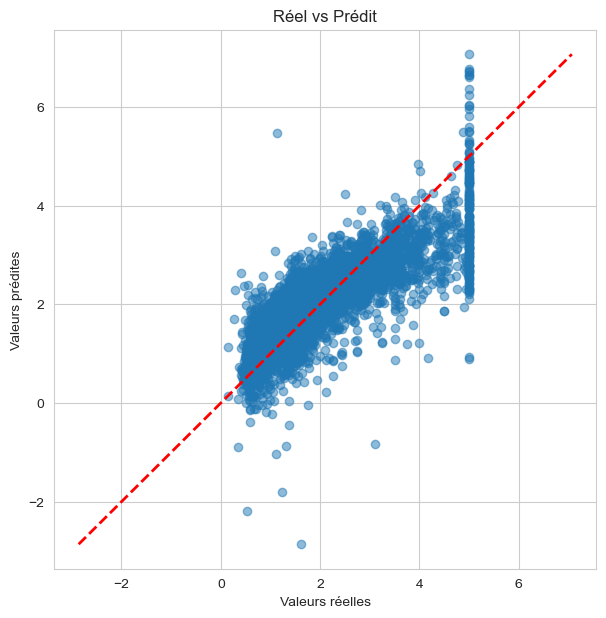

In [44]:
# 8. Visualisation des résultats
# Graphique 1 : Valeurs réelles vs Prédites
# Un scatter plot avec la ligne diagonale (prédiction parfaite)
# Plus les points sont proches de la diagonale, meilleur est le modèle
plt.figure(figsize=(7,7))

# Scatter plot
plt.scatter(y_test, y_pred, alpha=0.5)

# Perfect prediction line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)

plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Réel vs Prédit")

plt.show()

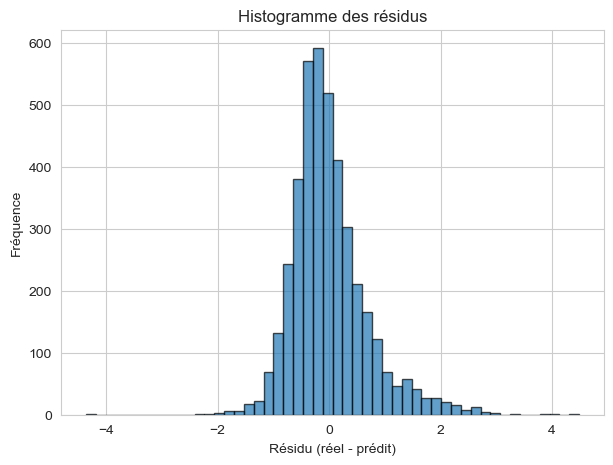

In [45]:
# Graphique 2 : Analyse des résidus (résidu = réel - prédit)
#   a) Histogramme des résidus → devrait suivre une distribution normale centrée sur 0
#   
#      b) Résidus vs Prédictions → les points doivent être dispersés aléatoirement (un pattern visible indiquerait que le modèle rate quelque chose)

residuals = y_test - y_pred

plt.figure(figsize=(7,5))
plt.hist(residuals, bins=50, edgecolor='k', alpha=0.7)
plt.title("Histogramme des résidus")
plt.xlabel("Résidu (réel - prédit)")
plt.ylabel("Fréquence")
plt.show()

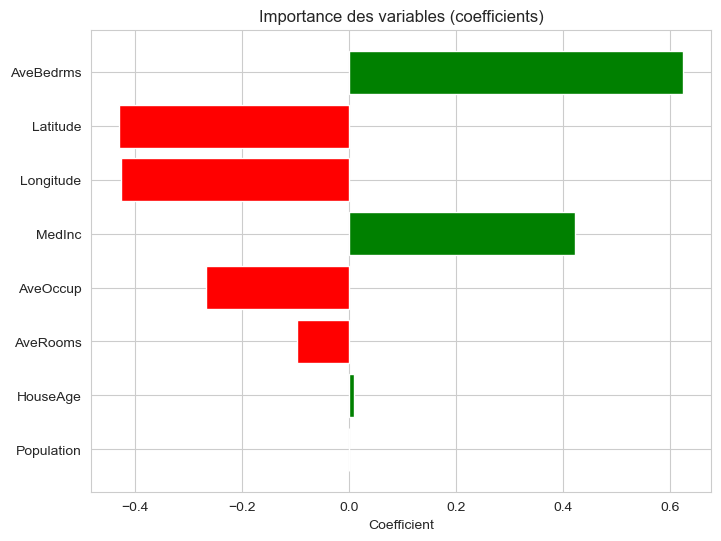

In [46]:
# Graphique 3 : Barplot des coefficients du modèle
# Permet de visualiser l'importance relative de chaque variable :
#   Coefficient positif = contribue à augmenter le prix
#   Coefficient négatif = contribue à diminuer le prix

# Combine feature names and coefficients
coeff_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": model.coef_
})

# Sort by absolute value for better visualization
coeff_df = coeff_df.reindex(coeff_df["Coefficient"].abs().sort_values(ascending=False).index)

# Plot
plt.figure(figsize=(8,6))
colors = np.where(coeff_df["Coefficient"] > 0, 'green', 'red')  # green=positive, red=negative
plt.barh(coeff_df["Feature"], coeff_df["Coefficient"], color=colors)
plt.xlabel("Coefficient")
plt.title("Importance des variables (coefficients)")
plt.gca().invert_yaxis()  # Optional: largest on top
plt.show()

In [49]:
# 9. Export des résultats
# Créer un DataFrame de résultats contenant :
#   - les features du test
#   - le prix réel
#   - le prix prédit
#   - le résidu (écart)
#   - l'erreur en pourcentage
# Puis exporter en CSV avec .to_csv("resultats_regression.csv")
# Residuals
residuals = y_test - y_pred

# Percentage error
percent_error = (residuals / y_test) * 100

# Combine into a DataFrame
results_df = X_test.copy()  # start with test features
results_df["MedHouseVal_Actual"] = y_test
results_df["MedHouseVal_Predicted"] = y_pred
results_df["Residual"] = residuals
results_df["Error_Percent"] = percent_error

# Optional: check first few rows
print(results_df.head())
results_df.to_csv("resultats_regression.csv", index=False)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
5150   1.6467      34.0  4.078431   1.082353      1083.0  4.247059     33.96   
1710   4.2348      25.0  6.020352   1.051804      3259.0  3.014801     37.99   
6510   3.2373      32.0  4.340097   1.038647      4119.0  3.979710     34.07   
9684   4.1742      17.0  5.082225   0.986699      2900.0  3.506651     36.72   
20017  3.6786      11.0  6.197590   1.093976      1402.0  3.378313     36.09   

       Longitude  MedHouseVal_Actual  MedHouseVal_Predicted  Residual  \
5150     -118.27               0.909               1.107819 -0.198819   
1710     -122.31               1.578               2.289220 -0.711220   
6510     -118.05               1.831               1.731051  0.099949   
9684     -121.64               1.599               2.344853 -0.745853   
20017    -119.06               0.729               1.191194 -0.462194   

       Error_Percent  
5150      -21.872304  
1710      -45.070963  
6510       